In [1]:
%matplotlib inline
%precision 3

u'%.3f'

In [2]:
import thinkstats2
import thinkplot
import ReadCsvs as rc
import JointAngFuncs as jaf
import KneeAngleHypTest as kneehyp

/Users/jpoh/anaconda/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /Users/jpoh/anaconda/lib/python2.7/argparse.pyc, but /Users/jpoh/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


In [3]:
AFO, PPAFO, Shoes=rc.ReadGaitData()

Sub001_6MW_AFO_0001.mat
Sub001_6MW_AFO_0002.mat
Sub001_6MW_AFO_0003.mat
Sub001_6MW_AFO_0004.mat
Sub001_6MW_AFO_0005.mat
Sub001_6MW_AFO_0006.mat
Sub001_6MW_AFO_0007.mat
Sub001_6MW_AFO_0008.mat
Sub001_6MW_AFO_0009.mat
Sub001_6MW_PPAFO_0001.mat
Sub001_6MW_PPAFO_0002.mat
Sub001_6MW_PPAFO_0003.mat
Sub001_6MW_PPAFO_0004.mat
Sub001_6MW_PPAFO_0005.mat
Sub001_6MW_PPAFO_0006.mat
Sub001_6MW_PPAFO_0007.mat
Sub001_6MW_PPAFO_0008.mat
Sub001_6MW_PPAFO_0009.mat
Sub001_6MW_Shoes_0001.mat
Sub001_6MW_Shoes_0002.mat
Sub001_6MW_Shoes_0003.mat
Sub001_6MW_Shoes_0004.mat
Sub001_6MW_Shoes_0005.mat
Sub001_6MW_Shoes_0006.mat
Sub001_6MW_Shoes_0007.mat
Sub001_6MW_Shoes_0008.mat
Sub001_6MW_Shoes_0009.mat
Sub002_6MW_AFO_0001.mat
Sub002_6MW_AFO_0002.mat
Sub002_6MW_AFO_0003.mat
Sub002_6MW_AFO_0004.mat
Sub002_6MW_AFO_0005.mat
Sub002_6MW_AFO_0006.mat
Sub002_6MW_AFO_0007.mat
Sub002_6MW_AFO_0008.mat
Sub002_6MW_AFO_0009.mat
Sub002_6MW_PPAFO_0001.mat
Sub002_6MW_PPAFO_0002.mat
Sub002_6MW_PPAFO_0003.mat
Sub002_6MW_PPAFO_0004.

####Computes the joint angles and plots them

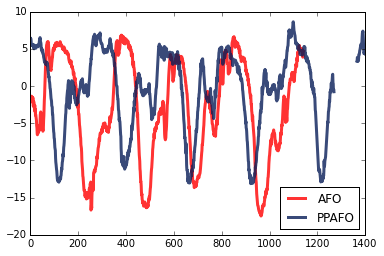

In [4]:
Raw_AFO_R_angle=jaf.AngleDiff(AFO, PPAFO, Shoes,'AFO', 2, 1, 6, 'R_LAT_KNEE', 'R_TIB', 'R_THIGH', False, True)
Raw_PPAFO_R_angle=jaf.AngleDiff(AFO, PPAFO, Shoes,'PPAFO', 2, 1, 6, 'R_LAT_KNEE', 'R_TIB', 'R_THIGH', False, True)
Raw_Shoes_R_angle=jaf.AngleDiff(AFO, PPAFO, Shoes,'Shoes', 2, 1, 6, 'R_LAT_KNEE', 'R_TIB', 'R_THIGH', False)

thinkplot.Plot(Raw_AFO_R_angle, label='AFO', color='red')
thinkplot.Plot(Raw_PPAFO_R_angle, label='PPAFO')
thinkplot.Show(legend=True, loc='lower right')

#### This was the original hypothesis test that relied on the anglediff computation above

In [5]:
print kneehyp.KneeAngleHypTest(Raw_PPAFO_R_angle, Raw_AFO_R_angle)

Actual Observed Effect Size= 2.41761801268
0.0


####This is a generalized version of the knee angle hypothesis test that computes its own anglediff data internally

In [6]:
print kneehyp.KneeAngleHypTest_General(AFO, PPAFO, Shoes, 'PPAFO', 'AFO', 2, 1, 6)

Actual Observed Effect Size= 2.41761801268
0.0


####This portion conducts the knee angle hypothesis on all paticipants

In [7]:
t=dict()
for participant in AFO.keys():
    afo_keys=AFO[participant].trials.keys()
    ppafo_keys=PPAFO[participant].trials.keys()
    overlap=set(afo_keys) & set(ppafo_keys)
    print 'ppafo=', ppafo_keys
    
    if overlap:
    
        baselinetrial=min(overlap)
    
        for eachtrial in overlap:
            if eachtrial>3:
                print "Participant=", participant
                print 'eachtrial=', eachtrial
                result=kneehyp.KneeAngleHypTest_General(AFO, PPAFO, Shoes,'PPAFO', 'AFO', participant, baselinetrial, eachtrial)
                t[(participant, eachtrial)]=result
        

ppafo= [1, 2, 3, 4, 5, 6, 7, 8, 9]
Participant= 1
eachtrial= 4
Actual Observed Effect Size= 1.96223747089
Participant= 1
eachtrial= 5
Actual Observed Effect Size= 1.13746038314
Participant= 1
eachtrial= 6
Actual Observed Effect Size= 0.516302724216
Participant= 1
eachtrial= 7
Actual Observed Effect Size= 0.932212329198
Participant= 1
eachtrial= 8
Actual Observed Effect Size= 0.184564006441
Participant= 1
eachtrial= 9
Actual Observed Effect Size= 1.78129632079
ppafo= [1, 2, 3, 4, 5, 6, 7, 8]
Participant= 2
eachtrial= 4
Actual Observed Effect Size= -2.11258548168
Participant= 2
eachtrial= 5
Actual Observed Effect Size= 1.51413704605
Participant= 2
eachtrial= 6
Actual Observed Effect Size= 2.41761801268
Participant= 2
eachtrial= 7
Actual Observed Effect Size= 2.65304261672
Participant= 2
eachtrial= 8
Actual Observed Effect Size= -0.304042736306
ppafo= [3, 4, 5, 6, 7, 8, 9]
Participant= 3
eachtrial= 5
Actual Observed Effect Size= nan
Participant= 3
eachtrial= 6
Actual Observed Effect Size=

/Users/jpoh/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


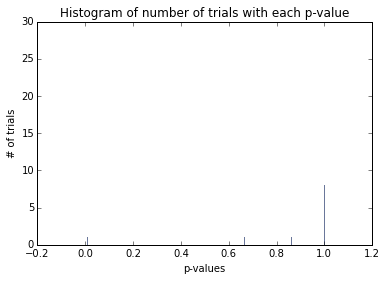

[0.0, 1.0, 0.062, 0.2, 0.215, 0.998, 0.282, 0.666, 0.086, 0.084, 0.973, 0.862, 0.966, 0.997, 0.009]
(13, 8)
(2, 8)
(13, 4)
(12, 5)
(12, 9)
(4, 4)
(12, 6)
(13, 7)
(12, 10)
(10, 4)
(12, 7)
(13, 6)
(10, 5)
(1, 8)
(2, 4)
(11, 6)
(12, 8)


In [8]:
hist=thinkstats2.Hist(t.values())
thinkplot.Hist(hist)
thinkplot.Show(legend=False, xlabel='p-values', ylabel='# of trials', title='Histogram of number of trials with each p-value')

print hist.Values()

for key in t.keys():
    if t[key]>0.1:
        print key
        #print t[key]